Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [19]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt

In [20]:
yelp_dataframe_offline = pd.read_csv("../data/yelp_dataframe.csv")
fsq_dataframe_offline = pd.read_csv("../data/fsq_dataframe.csv")
bike_stations = pd.read_csv("../data/greenbikeslc.csv")

In [21]:
complete_df = pd.merge(yelp_dataframe_offline, fsq_dataframe_offline, on='bike_station_id', how='inner')

In [22]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86123 entries, 0 to 86122
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_station_id  86123 non-null  int64  
 1   yelp_id          86123 non-null  object 
 2   venue_name_x     86123 non-null  object 
 3   category_x       86123 non-null  object 
 4   address_x        86123 non-null  object 
 5   distance_x       86123 non-null  float64
 6   price_x          47058 non-null  float64
 7   rating_x         86123 non-null  float64
 8   total_ratings_x  86123 non-null  int64  
 9   fsq_id           86115 non-null  object 
 10  venue_name_y     86115 non-null  object 
 11  category_y       86115 non-null  object 
 12  address_y        84919 non-null  object 
 13  distance_y       86115 non-null  float64
 14  price_y          61226 non-null  float64
 15  rating_y         37326 non-null  float64
 16  total_ratings_y  37326 non-null  float64
dtypes: float64(7

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: >

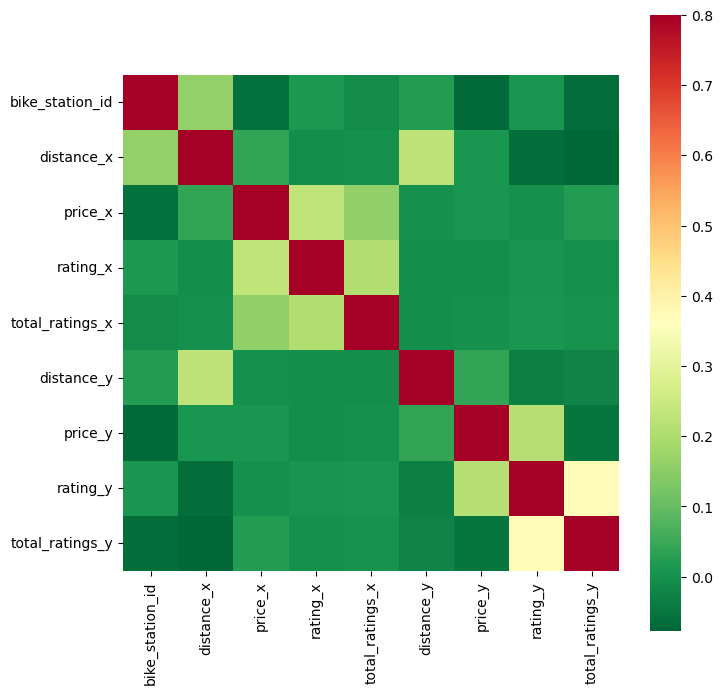

In [23]:
corrmat = complete_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

Initially there seems to be little correlation between any of the variables, at least in the ways of the bikestations having anything to do with the bars that we surveyed with the API calls. Any close correlation seems to be within the stats of the bars themselves, ie. the ratings being affected by either price or total ratings. We'll tackle this issue in the next notebook.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [24]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Connected to {db_file} successfully")
    except Error as e:
        print(e)
    return conn

def execute_query(conn, query):
    cursor = conn.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(e)

In [25]:
connection = create_connection("../data/stats_db.sqlite")

Connected to ../data/stats_db.sqlite successfully


In [48]:
try:
    bike_stations.to_sql('bike_stations', con=connection,if_exists='replace',index=False)
    print('bikes df loaded success')
except Error as e:
    print(f'error in bikes loading: {e}')
try:
    yelp_dataframe_offline.to_sql('yelp', con=connection,if_exists='replace',index=False)
    print('yelp loaded success')
except Error as e:
    print(f'error in yelp loading: {e}')
try:
    fsq_dataframe_offline.to_sql('fsq', con=connection,if_exists='replace',index=False)
    print('fsq loaded success')
except Error as e:
    print(f'error in fsq loading: {e}')

bikes df loaded success
yelp loaded success
fsq loaded success


Look at the data before and after the join to validate your data.

In [28]:
bike_stations_query = "SELECT * FROM bike_stations"
yelp_query = "SELECT * FROM yelp"
fsq_query = "SELECT * FROM fsq"

In [51]:
bike_stations_result = execute_query(connection, bike_stations_query)
bike_stations.info()
pd.DataFrame(bike_stations_result).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   short_id     59 non-null     int64  
 1   name         59 non-null     object 
 2   address      59 non-null     object 
 3   latitude     59 non-null     float64
 4   longitude    59 non-null     float64
 5   empty_slots  59 non-null     int64  
 6   free_bikes   59 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59 non-null     int64  
 1   1       59 non-null     object 
 2   2       59 non-null     object 
 3   3       59 non-null     float64
 4   4       59 non-null     float64
 5   5       59 non-null     int64  
 6   6       59 non-null     int64  
dtypes: float64(2), int

In [53]:
fsq_result = execute_query(connection, fsq_query)
fsq_dataframe_offline.info()
pd.DataFrame(fsq_result).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_station_id  1923 non-null   int64  
 1   fsq_id           1921 non-null   object 
 2   venue_name       1921 non-null   object 
 3   category         1921 non-null   object 
 4   address          1892 non-null   object 
 5   distance         1921 non-null   float64
 6   price            1375 non-null   float64
 7   rating           806 non-null    float64
 8   total_ratings    806 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 135.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1923 non-null   int64  
 1   1       1921 non-null   object 
 2   2       1921 non-null   object 
 3   3       1921 non-null   obje

In [54]:
yelp_result = execute_query(connection, yelp_query)
yelp_dataframe_offline.info()
pd.DataFrame(yelp_result).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_station_id  2283 non-null   int64  
 1   yelp_id          2283 non-null   object 
 2   venue_name       2283 non-null   object 
 3   category         2283 non-null   object 
 4   address          2283 non-null   object 
 5   distance         2283 non-null   float64
 6   price            1267 non-null   float64
 7   rating           2283 non-null   float64
 8   total_ratings    2283 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 160.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2283 non-null   int64  
 1   1       2283 non-null   object 
 2   2       2283 non-null   object 
 3   3       2283 non-null   obje